In [114]:
pip install ucimlrepo

In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler , LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import os

In [116]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
heart_disease = pd.concat([X, y], axis=1)
data=heart_disease
#save data to csv
os.makedirs('data', exist_ok=True)
data.to_csv('data/heart_disease.csv', index=False)

In [117]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [118]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [119]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [120]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [121]:
print(data.isnull().sum())# check missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [122]:
data.dropna(inplace=True)

In [123]:
# Handle missing values
data.fillna(data.mean(), inplace=True)

In [124]:
data[data.duplicated()].count() #check duplicated values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [125]:
data.nunique() # check values possible in each feature

,0
age,41
sex,2
cp,4
trestbps,50
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


# Exploratory Data Analysis (EDA)

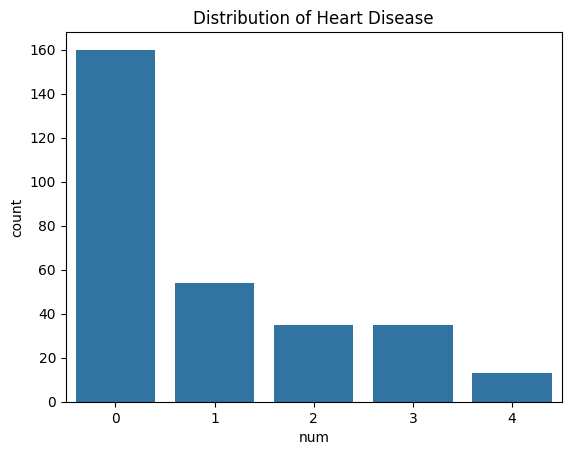

In [126]:
col=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.countplot(x='num', data=data)
plt.title('Distribution of Heart Disease')
plt.show()

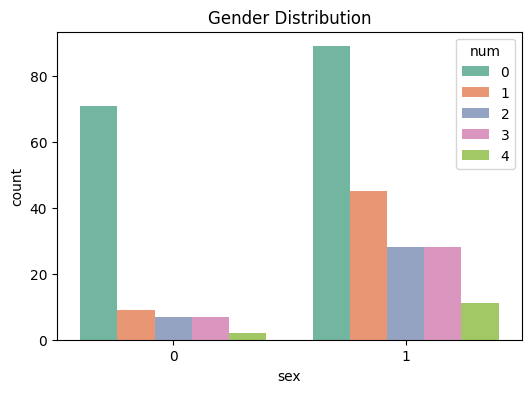

In [127]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", data=data, hue="num", palette="Set2")
plt.title("Gender Distribution")
plt.show()

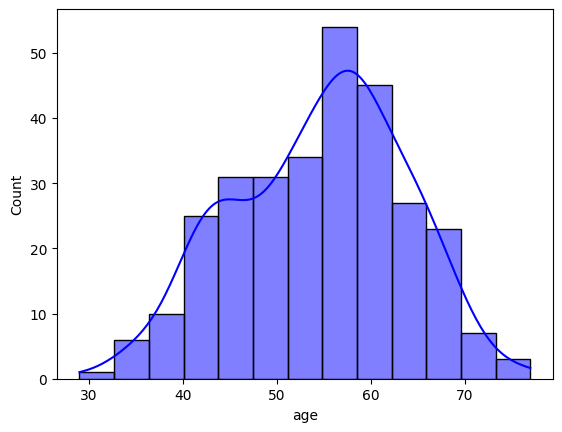

In [128]:
sns.histplot(data['age'],kde=True,color='blue')
plt.show()

<Axes: xlabel='age', ylabel='num'>

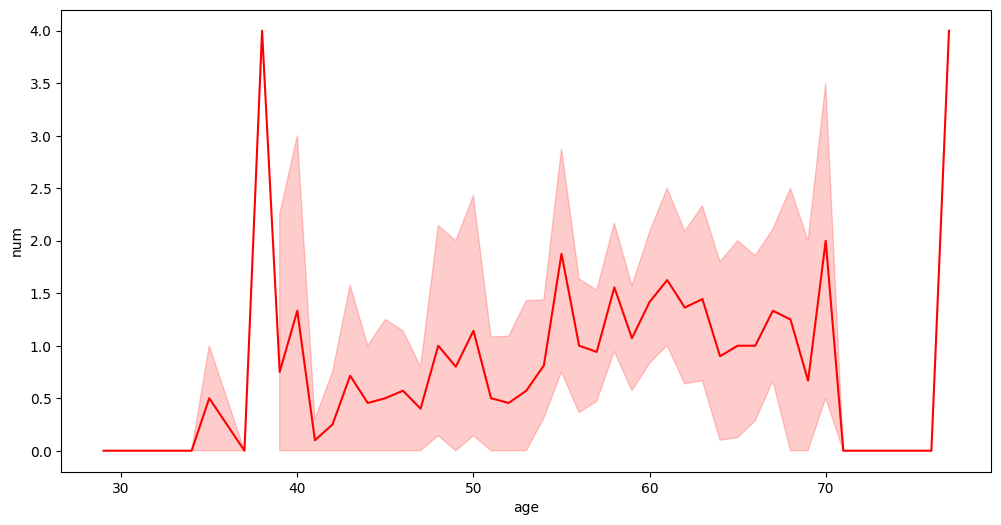

In [129]:
plt.figure(figsize=(12,6))
sns.lineplot(x=data['age'],y=data['num'],color='red')

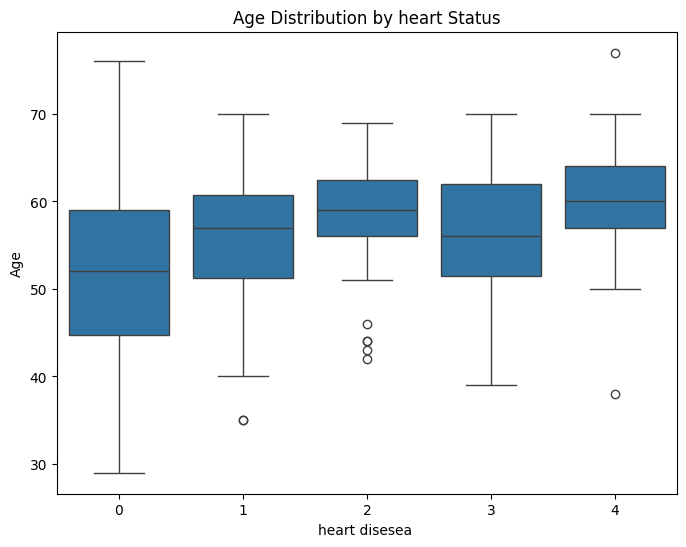

In [130]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='age', data=data)
plt.title('Age Distribution by heart Status')
plt.xlabel('heart disesea ')
plt.ylabel('Age')
plt.show()

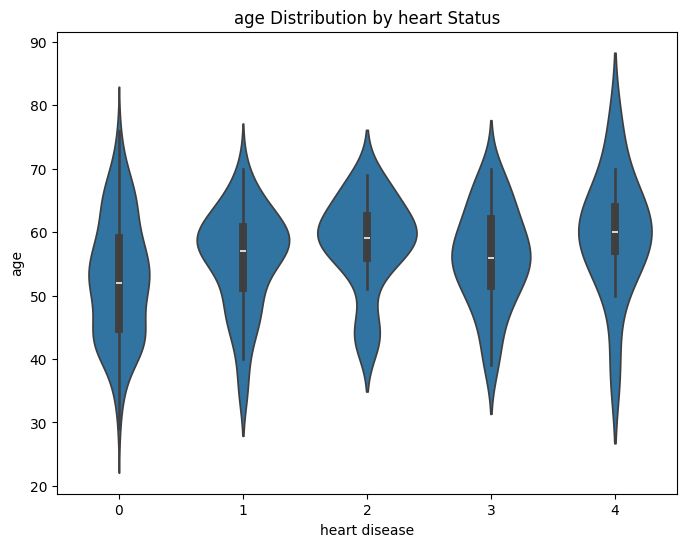

In [131]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='num', y='age', data=data)
plt.title('age Distribution by heart Status')
plt.xlabel('heart disease')
plt.ylabel('age')
plt.show()

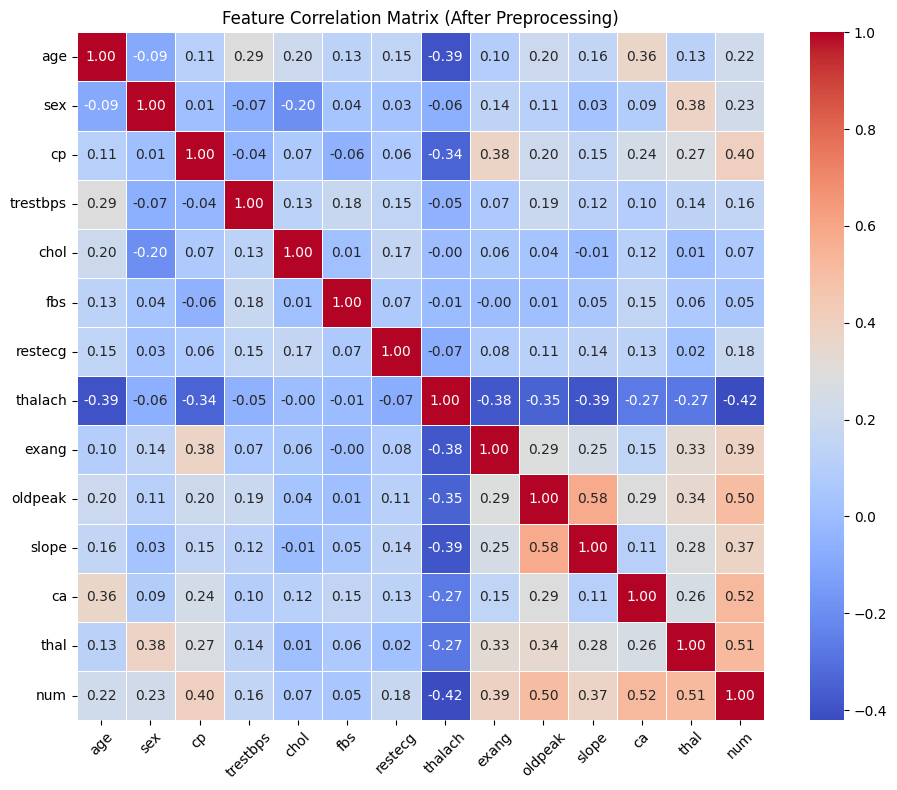

In [132]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Title and display
plt.title("Feature Correlation Matrix (After Preprocessing)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Encoding

In [133]:
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

#scaler

In [134]:
# Standardize numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('num') # Exclude the target variable
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

#save cleaned data

In [136]:
#save cleaned data
data.to_csv('data/heart_disease_cleaned.csv', index=False)